In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

import mpl_toolkits.axisartist.floating_axes as floating_axes
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import FixedLocator, MaxNLocator, DictFormatter
import matplotlib.ticker as ticker

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


For central Earth image

In [12]:
import requests
image_url = 'http://www.clipartbest.com/cliparts/KTn/LeA/KTnLeA9qc.png'
img_data = requests.get(image_url).content
with open('earth.png', 'wb') as handler:
    handler.write(img_data)

In [21]:
def polar_earth_plot(lat, lev, values, lev_unit='hPa', v_fix=False, title=None, cmap=plt.cm.inferno, c_label=None):
    # Currently assumes that lev describes pressure levels and that lat runs -90 to 90

    tr = PolarAxes.PolarTransform()

    # Set up coords, radians for latitude, and log for pressure levs
    azimuths = np.radians(lat)
    # Ensure fit to edge of plot
    azimuths[0] = -np.pi/2
    azimuths[-1] = np.pi/2
    
    # We scale zeniths to be between 0.28 and 1 for the figure
    # and reverse them because the pressure axis is inverted
    log_plev = np.log10(lev)
    zeniths = 0.28 + (np.max(log_plev) - log_plev) * (1 - 0.28) / (np.max(log_plev) - np.min(log_plev))

    # Controlling ticks on the plot
    # We want no degree ticks
    tick_formatter1 = DictFormatter(dict(zip([],[])))
    grid_locator1 = FixedLocator([np.pi/4, 0, -np.pi/4])
    
    # For the pressure levels we need to reverse the axis and create ticks which match zeniths to pressure
    log_plev_ticks = np.unique(np.ceil(log_plev))
    zenith_ticks = 0.28 + (np.max(log_plev) - log_plev_ticks) * (1 - 0.28) / (np.max(log_plev) - np.min(log_plev))
    tick_formatter2 = DictFormatter(dict(zip(zenith_ticks, map(str, 10 ** log_plev_ticks))))
    grid_locator2 = FixedLocator(zenith_ticks)

    # Grid parameters
    gh = floating_axes.GridHelperCurveLinear(tr,
                                             extremes=(.5*np.pi, -.5* np.pi, np.min(zeniths), np.max(zeniths)),
                                             grid_locator1=grid_locator1,
                                             tick_formatter1=tick_formatter1,
                                             grid_locator2=grid_locator2,
                                             tick_formatter2=tick_formatter2)

    # Setup figure
    fig = plt.figure(figsize=(6,6))
    ax = floating_axes.FloatingSubplot(fig, 111, grid_helper=gh)
    fig.add_subplot(ax)
    r, theta = np.meshgrid(zeniths, azimuths)
    aux_ax = ax.get_aux_axes(tr)
    aux_ax.patch = ax.patch
    ax.patch.zorder = 0.9

    # Plotting
    if v_fix:
        plot = aux_ax.pcolormesh(theta, r,values.T, vmin=v_fix[0], vmax=v_fix[1], linewidth=0, cmap=cmap)
    else:
        plot = aux_ax.pcolormesh(theta, r,values.T, linewidth=0, cmap=cmap)
    plot.set_edgecolor('face')

    # Function for formatting ticks into scientific notation
    def fmt(x, pos):
        a, b = '{:.0e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)
    
    # Labels and ticks
    plt.ylabel('Pressure (hPa)')
    ax.set_title(title)

    # Colorbar
    cbaxes = fig.add_axes([0.07, 0.15, 0.03, 0.7]) 
    cb = plt.colorbar(plot, cax=cbaxes, orientation='vertical', label=c_label)#, format=ticker.FuncFormatter(fmt))
    cbaxes.yaxis.set_ticks_position('left')

    # Central earth
    im = plt.imread('earth.png')
    newax = fig.add_axes([0.22,.40,0.2,0.2], zorder=-1)
    newax.imshow(im, alpha=1, resample=False)
    newax.axis('off')

    sns.despine(left=True, bottom=True, top=True, right=True)
    plt.savefig('a.png', bbox_inches='tight', dpi=180)
    plt.show()
    
    return

Basic plotting

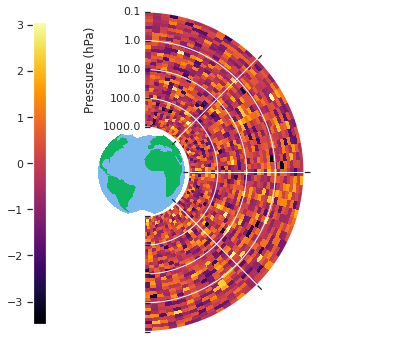

In [45]:
plev = np.geomspace(1000,0.1, 36)
lat = np.linspace(-90,90, 60)
fake_data = np.random.normal(size=(36,60))

polar_earth_plot(lat, plev, fake_data)

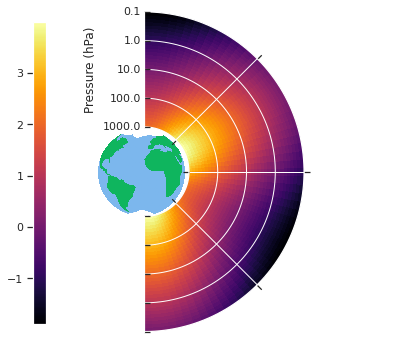

In [44]:
plev = np.geomspace(1000,0.1, 36)
lat = np.linspace(-90,90, 60)
l_grid, p_grid = np.meshgrid(lat,plev)
fake_data2 = np.sin(np.pi * np.radians(l_grid)) + np.log10(p_grid)

polar_earth_plot(lat, plev, fake_data2)